In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.1.0


In [2]:
dataset = pd.read_csv("improved_personality_traits_datection_dataset.csv")
dataset.drop(dataset.columns[0], axis = 1, inplace = True) 
dataset

,Review,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,"""Well, right now I just woke up from a mid-day...",0,1,1,0,1
1,"Well, here we go with the stream of consciousn...",0,0,1,0,0
2,"""An open keyboard and buttons to push. The thi...",0,1,0,1,1
3,I can't believe it! It's really happening! M...,1,0,1,1,0
4,"""Well, here I go with the good old stream of c...",1,0,1,0,1
...,...,...,...,...,...,...
2447,I'm home. wanted to go to bed but remembe...,0,1,0,1,0
2448,Stream of consiousnesssskdj. How do you s...,1,1,0,0,1
2449,"It is Wednesday, December 8th and a lot has be...",0,0,1,0,0
2450,"""Man this week has been hellish. Anyways, now ...",0,1,0,0,1


In [3]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

training_labels_final = []
testing_labels_final = []

In [4]:
training_sentences = dataset['Review'][0:1500]
training_labels = dataset['Extroversion'][0:1500]

testing_sentences = dataset['Review'][1500:]
testing_labels = dataset['Extroversion'][1500:]

#training_labels_final = np.array(training_labels)
#testing_labels_final = np.array(testing_labels)

training_labels_final = np.asarray(training_labels).astype(np.float32)
testing_labels_final = np.asarray(testing_labels).astype(np.float32)

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

well here we go with the stream of consciousness essay i used to do things like this in high school sometimes they were pretty interesting but i often find myself with a lack of things to say i normally consider myself someone who gets straight to the point i wonder if i should hit enter any time to send this back to the front maybe i'll fix it later my friend is playing guitar in my room now sort of playing anyway more like messing with it he's still learning there's a drawing on the wall next to me comic book characters i think but i'm not sure who they are it's been a while since i've kept up with
Well, here we go with the stream of consciousness essay. I used to do things like this in high school sometimes. They were pretty interesting, but I often find myself with a lack of things to say. I normally consider myself someone who gets straight to the point. I wonder if I should hit enter any time to send this back to the front. Maybe I'll fix it later. My friend is playing guitar in 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/50
1500/1500 [==============================] - 7s 4ms/sample - loss: 0.6934 - accuracy: 0.4927 - val_loss: 0.6930 - val_accuracy: 0.5168
Epoch 2/50
1500/1500 [==============================] - 2s 2ms/sample - loss: 0.6930 - accuracy: 0.5167 - val_loss: 0.6930 - val_accuracy: 0.5168
Epoch 3/50
1500/1500 [==============================] - 2s 2ms/sample - loss: 0.6924 - accuracy: 0.5367 - val_loss: 0.6928 - val_accuracy: 0.5147
Epoch 4/50
1500/1500 [==============================] - 2s 2ms/sample - loss: 0.6846 - accuracy: 0.5893 - val_loss: 0.6954 - val_accuracy: 0.4968
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/sample - loss: 0.6022 - accuracy: 0.7173 - val_loss: 0.7742 - val_accuracy: 0.4926
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/sample - loss: 0.3895 - accuracy: 0.8373 - val_loss: 0.9660 - val_accuracy: 0.4842
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/sample - loss:

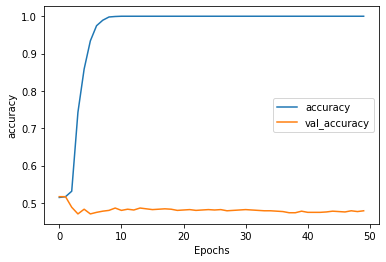

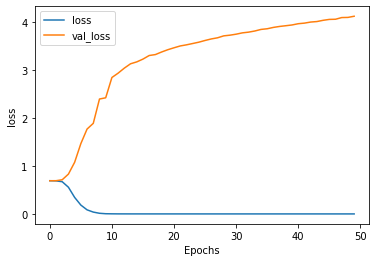

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [15]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/50
1500/1500 [==============================] - 6s 4ms/sample - loss: 0.6932 - accuracy: 0.5173 - val_loss: 0.6930 - val_accuracy: 0.5168
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6880 - accuracy: 0.5167 - val_loss: 0.6950 - val_accuracy: 0.5168
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.6502 - accuracy: 0.6060 - val_loss: 0.7094 - val_accuracy: 0.4958
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.5236 - accuracy: 0.7967 - val_loss: 0.8715 - val_accuracy: 0.5021
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.3684 - accuracy: 0.8840 - val_loss: 0.9584 - val_accuracy: 0.4884
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/sample - loss: 0.2059 - accuracy: 0.9393 - val_loss: 1.0447 - val_accuracy: 0.4779
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/sample - loss:

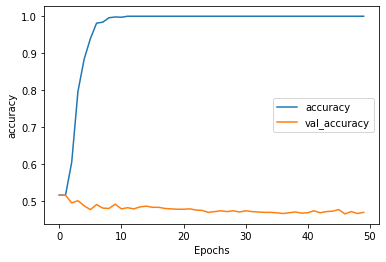

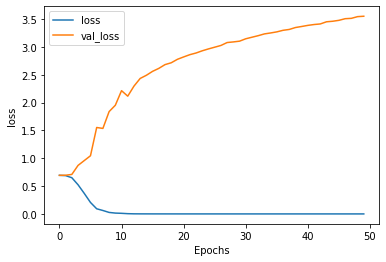

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [18]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 1500 samples, validate on 952 samples
Epoch 1/50
1500/1500 [==============================] - 1s 899us/sample - loss: 0.6929 - accuracy: 0.5167 - val_loss: 0.6925 - val_accuracy: 0.5168
Epoch 2/50
1500/1500 [==============================] - 0s 264us/sample - loss: 0.6911 - accuracy: 0.5167 - val_loss: 0.6916 - val_accuracy: 0.5168
Epoch 3/50
1500/1500 [==============================] - 1s 342us/sample - loss: 0.6731 - accuracy: 0.5467 - val_loss: 0.6932 - val_accuracy: 0.5305
Epoch 4/50
1500/1500 [==============================] - 0s 313us/sample - loss: 0.6039 - accuracy: 0.6760 - val_loss: 0.7073 - val_accuracy: 0.5452
Epoch 5/50
1500/1500 [==============================] - 0s 306us/sample - loss: 0.5000 - accuracy: 0.8320 - val_loss: 0.7671 - val_accuracy: 0.5399
Epoch 6/50
1500/1500 [==============================] - 0s 264us/sample - loss: 0.4178 - accuracy: 0.9067 - val_loss: 0.7992 - val_accuracy: 0.5399
Epoch 7/50
1500/1500 [==============================] - 0s 276us/

KeyboardInterrupt: 

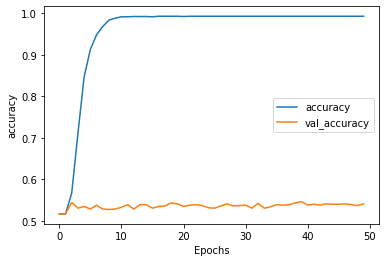

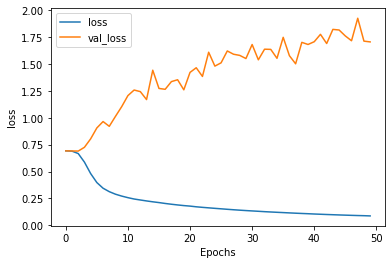

In [82]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')